Checking every iteration of the raw data to try and find the 20Hz/30Hz tags.

In [2]:
from attridict import AttriDict

TRIGGERS = AttriDict(
    STATEEND=10,
    TRIALEND=11,
    BLOCKEND=12,
    ITI=13,
    FIXATION=14,
    BREAK=15,
    INTERBLOCK=16,
    ABORT=17,
    ERROR=18,
    EXPEND=255,
    # 20-30 are reserved for the query condition
    QUERY=dict(
        TRUE=dict(
            F1LEFT=20,
            F1RIGHT=21,
        ),
        FALSE=dict(
            F1LEFT=22,
            F1RIGHT=23,
        ),
    ),
    # 30-40 are reserved for the two-word stimulus condition
    TWOWORD=dict(
        PHRASE=dict(
            F1LEFT=30,
            F1RIGHT=31,
        ),
        NONPHRASE=dict(
            F1LEFT=32,
            F1RIGHT=33,
        ),
        NONWORD=dict(
            F1LEFT=34,
            F1RIGHT=35,
        ),
    ),
    # 40-50 are reserved for the one-word stimulus condition
    ONEWORD=dict(
        WORD=dict(
            F1=40,
            F2=41,
        ),
        NONWORD=dict(
            F1=42,
            F2=43,
        ),
    ),
)

In [4]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from intermodulation.utils import nested_iteritems

mne.set_config("MNE_BROWSER_BACKEND", "matplotlib")
%matplotlib inline

# Load the epoched data
datapath = Path("/home/gercek/scratch/syntax_im/241018")
events = mne.read_events(datapath / "pilot03-eve.fif")
events1w = events[np.isin(events[:, 2], np.arange(40, 50))]
usedtrigs = np.unique(events1w[:, 2])
triglabels = {"/".join(k): v for k, v in nested_iteritems(TRIGGERS) if v in usedtrigs}
target_evok = ["F1", "F2"]

# Load raw data with only cHPI and line noise filtering, epoch, and compute PSD on 1-word task
# rawfile = datapath / "pilot03.fif"
# raw = mne.io.read_raw_fif(rawfile, preload=True)
# epochs_raw = mne.Epochs(
#     raw, events1w, event_id=triglabels, tmin=-0.2, tmax=2.0, preload=True, baseline=(None, 0)
# )
# del raw
# spect_rawf1 = epochs_raw["F1"].compute_psd(fmax=70, n_jobs=-1)
# spect_rawf2 = epochs_raw["F2"].compute_psd(fmax=70, n_jobs=-1)
# evokeds_raw = []
# # for evok in target_evok:
# #     evokeds_raw.append(epochs_raw[evok].average())
# for evok in target_evok:
#     evokeds_raw.append(
#         epochs_raw[evok].compute_tfr(method="morlet", freqs=np.arange(15, 70, 1), n_jobs=-1)
#     )
# del epochs_raw


# # Load raw data with only cHPI and line noise filtering, epoch, and compute PSD on 1-word task
# rawfile = datapath / "pilot03_cHPI_line_preproc.fif"
# raw = mne.io.read_raw_fif(rawfile, preload=True)
# epochs_chpiline = mne.Epochs(
#     raw, events1w, event_id=triglabels, tmin=-0.2, tmax=2.0, preload=True, baseline=(None, 0)
# )
# del raw
# spect_chpilinef1 = epochs_chpiline["F1"].compute_psd(fmax=70, n_jobs=-1)
# spect_chpilinef2 = epochs_chpiline["F2"].compute_psd(fmax=70, n_jobs=-1)
# evokeds_chpiline = []
# # for evok in target_evok:
# #     evokeds_chpiline.append(epochs_chpiline[evok].average())# evokeds_chpiline = []
# for evok in target_evok:
#     evokeds_chpiline.append(
#         epochs_chpiline[evok].compute_tfr(method="morlet", freqs=np.arange(15, 70, 1), n_jobs=-1)
#     )
# del epochs_chpiline

# As above, but for SSS filtered data
rawfile = datapath / "pilot03_cHPI_line_sss.fif"
raw = mne.io.read_raw_fif(rawfile, preload=True)
epochs_sss = mne.Epochs(
    raw, events1w, event_id=triglabels, tmin=-0.2, tmax=2.0, preload=True, baseline=(None, 0)
)
del raw
spect_sssf1 = epochs_sss["F1"].compute_psd(fmax=70, n_jobs=-1)
spect_sssf2 = epochs_sss["F2"].compute_psd(fmax=70, n_jobs=-1)
evokeds_sss = []
# for evok in target_evok:
#     evokeds_sss.append(epochs_sss[evok].average())
for evok in target_evok:
    evokeds_sss.append(
        epochs_sss[evok].compute_tfr(method="morlet", freqs=np.arange(15, 30, 1), n_jobs=-1)
    )

# As above, but for ICA filtering also
rawfile = datapath / "pilot03_cHPI_line_sss.fif"
icafile = datapath / "pilot03_cHPI_line_sss-ica.fif"
ica = mne.preprocessing.read_ica(icafile)
raw = mne.io.read_raw_fif(rawfile, preload=True)
raw = ica.apply(raw, exclude=[4, 12, 18])
epochs_ica = mne.Epochs(
    raw, events1w, event_id=triglabels, tmin=-0.2, tmax=2.0, preload=True, baseline=(None, 0)
)
del raw
spect_icaf1 = epochs_ica["F1"].compute_psd(fmax=70, n_jobs=-1)
spect_icaf2 = epochs_ica["F2"].compute_psd(fmax=70, n_jobs=-1)
evokeds_ica = []
# for evok in target_evok:
#     evokeds_ica.append(epochs_ica[evok].average())
for evok in target_evok:
    evokeds_ica.append(
        epochs_ica[evok].compute_tfr(method="morlet", freqs=np.arange(15, 30, 1), n_jobs=-1)
    )


# As above, but for the AutoReject epochs which have excluded trials and "repairing" of the data
# epochfile = datapath / "pilot03-preproc-1w-epo-autorej.fif"
# epochs_arj = mne.read_epochs(epochfile)
# spect_arj = epochs_arj["F1"].compute_psd(fmax=70, n_jobs=-1)
# evokeds_arj = []
# for evok in target_evok:
#     evokeds_arj.append(epochs_arj[evok].average())
# del epochs_arj


Opening raw data file /home/gercek/scratch/syntax_im/241018/pilot03_cHPI_line_sss.fif...


/tmp/ipykernel_4049547/2312471445.py:57: RuntimeWarning: This filename (/home/gercek/scratch/syntax_im/241018/pilot03_cHPI_line_sss.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(rawfile, preload=True)


    Range : 19000 ... 1751999 =     19.000 ...  1751.999 secs
Ready.
Opening raw data file /home/gercek/scratch/syntax_im/241018/pilot03_cHPI_line_sss-1.fif...
    Range : 1752000 ... 2674999 =   1752.000 ...  2674.999 secs
Ready.
Reading 0 ... 2655999  =      0.000 ...  2655.999 secs...
Not setting metadata
120 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 2201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 294 out of 297 | elapsed:   10.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 297 out of 297 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 294 out of 297 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 297 out of 297 | elapsed:    4.6s finished


Reading /home/gercek/scratch/syntax_im/241018/pilot03_cHPI_line_sss-ica.fif ...
Now restoring ICA solution ...
Ready.
Opening raw data file /home/gercek/scratch/syntax_im/241018/pilot03_cHPI_line_sss.fif...


/tmp/ipykernel_4049547/2312471445.py:76: RuntimeWarning: This filename (/home/gercek/scratch/syntax_im/241018/pilot03_cHPI_line_sss.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(rawfile, preload=True)


    Range : 19000 ... 1751999 =     19.000 ...  1751.999 secs
Ready.
Opening raw data file /home/gercek/scratch/syntax_im/241018/pilot03_cHPI_line_sss-1.fif...
    Range : 1752000 ... 2674999 =   1752.000 ...  2674.999 secs
Ready.
Reading 0 ... 2655999  =      0.000 ...  2655.999 secs...
Applying ICA to Raw instance
    Transforming to ICA space (100 components)
    Zeroing out 3 ICA components
    Projecting back using 297 PCA components
Not setting metadata
120 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 2201 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 294 out of 297 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 297 out of 297 | elapsed:    4.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 294 out of 297 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 297 out of 297 | elapsed:    4.8s finished


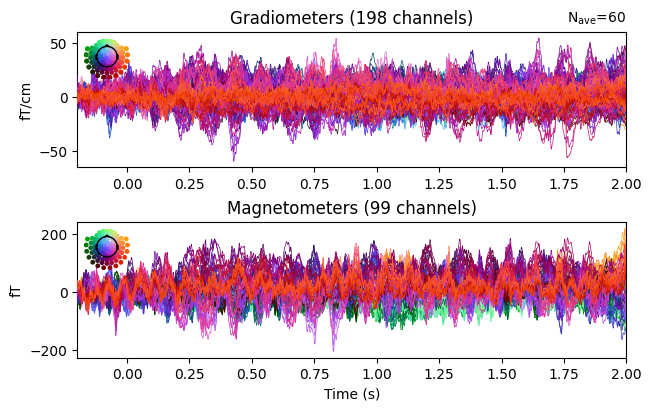

No baseline correction applied


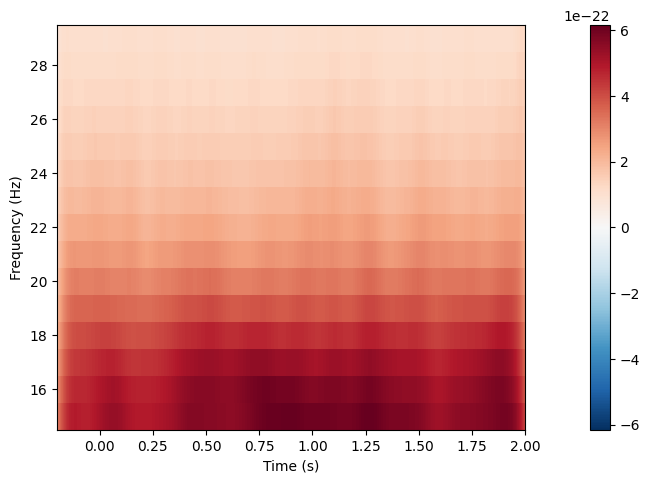

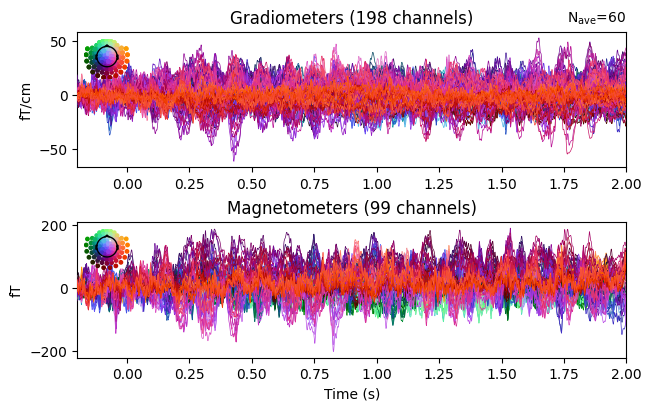

No baseline correction applied


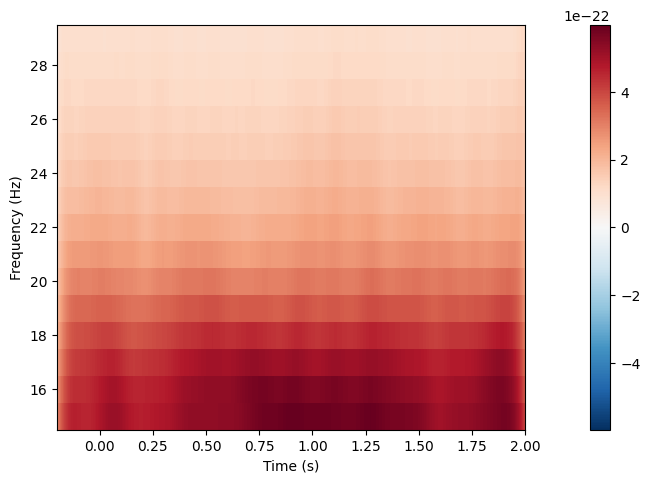

[<Figure size 640x480 with 2 Axes>]

In [5]:
# basebands = {"Alpha (8-12 Hz)": (8, 12), "Beta (12-30 Hz)": (12, 30), "Gamma (30-45 Hz)": (30, 45)}
# basebands["Stimulus F1 (20 Hz)"] = (19, 21)
# basebands["Stimulus F2 (30 Hz)"] = (29, 31)
# fig, ax = plt.subplots(2, 5, figsize=(18, 8))
# spect_rawf1.plot_topomap(bands=basebands, axes=ax[0])
# spect_rawf2.plot_topomap(bands=basebands, axes=ax[1])
# ax[0, 0].set_ylabel("One-Word F1 trials (20Hz)")
# ax[1, 0].set_ylabel("One-Word F2 trials (30Hz)")
# # ax[2, 0].set_ylabel("One-word cHPI+Line+SSS+AutoReject")
# fig.suptitle(
#     "Power spectral density topomaps for F1 (top) and F2 (bottom) trials:\nUnfiltered data"
# )
# fig.tight_layout()

# fig, ax = plt.subplots(2, 5, figsize=(18, 8))
# spect_chpilinef1.plot_topomap(bands=basebands, axes=ax[0])
# spect_chpilinef2.plot_topomap(bands=basebands, axes=ax[1])
# ax[0, 0].set_ylabel("One-Word F1 trials (20Hz)")
# ax[1, 0].set_ylabel("One-Word F2 trials (30Hz)")
# # ax[2, 0].set_ylabel("One-word cHPI+Line+SSS+AutoReject")
# fig.suptitle(
#     "Power spectral density topomaps for F1 (top) and F2 (bottom) trials:\ncHPI + line filtered data"
# )
# fig.tight_layout()

# fig, ax = plt.subplots(2, 5, figsize=(18, 8))
# spect_sssf1.plot_topomap(bands=basebands, axes=ax[0])
# spect_sssf2.plot_topomap(bands=basebands, axes=ax[1])
# ax[0, 0].set_ylabel("One-Word F1 trials (20Hz)")
# ax[1, 0].set_ylabel("One-Word F2 trials (30Hz)")
# fig.suptitle(
#     "Power spectral density topomaps for F1 (top) and F2 (bottom) trials:\ncHPI + line + SSS filtered data"
# )
# fig.tight_layout()

# fig, ax = plt.subplots(2, 3, figsize=(12, 8))
# spect_rawf1.plot(picks="data", axes=ax[:, 0])
# spect_chpilinef1.plot(picks="data", axes=ax[:, 1])
# spect_sssf1.plot(picks="data", axes=ax[:, 2])
# fig.tight_layout()

# for i, ev in enumerate([evokeds_raw, evokeds_chpiline, evokeds_sss]):
epochs_sss["F1"].average().plot()
evokeds_sss[0].average().plot(combine="rms")
# evokeds_sss[1].average().plot()
epochs_ica["F1"].average().plot()
evokeds_ica[0].average().plot(combine="rms")

In [8]:
basebands = {"Beta (12-30 Hz)": (12, 30), "Gamma (30-45 Hz)": (30, 45)}
basebands["Stimulus F1 (20 Hz)"] = (19, 21)
basebands["Stimulus F2 (30 Hz)"] = (29, 31)

evokeds_ica[0].average().plot_topomap(basebands)

No baseline correction applied


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [8]:
ax[i]

array([<Axes: title={'center': 'Magnetometers (RMS)'}, xlabel='Time (s)', ylabel='fT'>,
       <Axes: title={'center': 'Gradiometers (RMS)'}, xlabel='Time (s)', ylabel='fT/cm'>],
      dtype=object)

In [10]:
%debug

> /tmp/gercek_li_venv/lib/python3.10/site-packages/mne/time_frequency/tfr.py(544)_compute_tfr()
    542     # Check wavelets
    543     if len(Ws[0][0]) > epoch_data.shape[2]:
--> 544         raise ValueError(
    545             "At least one of the wavelets is longer than the "
    546             "signal. Use a longer signal or shorter wavelets."

    420 def _compute_tfr(
    421     epoch_data,
    422     freqs,
    423     sfreq=1.0,
    424     method="morlet",
    425     n_cycles=7.0,
    426     zero_mean=None,
    427     time_bandwidth=None,
    428     use_fft=True,
    429     decim=1,
    430     output="complex",
    431     n_jobs=None,
    432     *,
    433     verbose=None,
    434 ):
    435     """Compute time-frequency transforms.
    436 
    437     Parameters
    438     ----------
    439     epoch_data : array of shape (n_epochs, n_channels, n_times)
    440         The epochs.default ``'complex'``
    441     freqs : array-like of floats, shape (n_freqs)
